In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
# Make a function to extract the data
def extract(fname):
    #Try reading the file
    data1 = np.loadtxt(f"{fname}", skiprows=10, usecols=np.arange(2,200,1, dtype=int))
    data2 = np.loadtxt(f"{fname} 2nd part", skiprows=10, usecols=np.arange(2,200,1, dtype=int))
    data3 = np.loadtxt(f"{fname} 3rd part", skiprows=10, usecols=np.arange(2,112,1, dtype=int))
    
    agg_data = np.zeros(shape=(2, data1.shape[1] + data2.shape[1] + data3.shape[1]))
    agg_data[:,0:data1.shape[1]] = data1
    agg_data[:,data1.shape[1]:data1.shape[1] + data2.shape[1]] = data2
    agg_data[:,data1.shape[1] + data2.shape[1]:data1.shape[1] + data2.shape[1] + data3.shape[1]] = data3
    
    return agg_data

In [3]:
strain_arr = np.array([0, -430, -936, -1084, -1232, -1364], dtype=np.int64)

data = []
for i, strain in enumerate(strain_arr):
    data.append(extract(f"{i}"))
    
data_np = np.array(data)
print(data_np.shape)

(6, 2, 506)


In [4]:
def gaussian(x, x0, sigma, scale):
    return scale*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-np.power(x-x0,2)/(2*sigma**2))

In [5]:
peaks = np.zeros(6)

for i, strain in enumerate(strain_arr):
    fit = curve_fit(gaussian, data_np[i,0,:], data_np[i,1,:], p0=[1550, 1,1])[0]
    peaks[i] = fit[0]
    
d_peaks = peaks - peaks[0]
    

In [6]:
res = linregress(strain_arr, d_peaks)
print(res)

LinregressResult(slope=0.001122810243839756, intercept=-0.024221932070580543, rvalue=0.9993324650988267, pvalue=6.682555387014148e-07, stderr=2.0523237536397266e-05, intercept_stderr=0.01985275755735877)


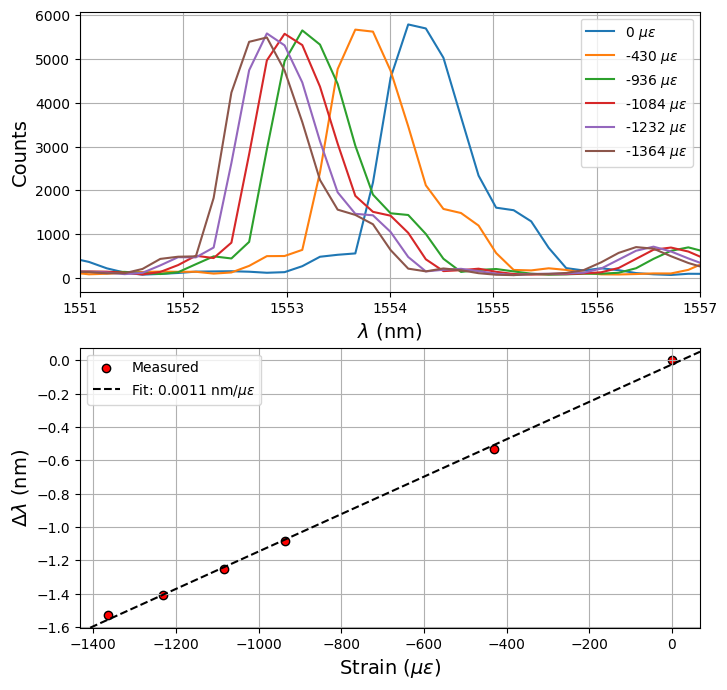

In [17]:
fig, ax = plt.subplots(2,1, figsize = (8,8))

for i, strain in enumerate(strain_arr):
    ax[0].plot(data_np[i,0,:], data_np[i,1,:], label = f"{strain} $\mu\epsilon$")
    
#for peak in peaks:
#    ax[0].axvline(peak)
    
ax[0].set_xlim(1551, 1557)
ax[0].grid()
ax[0].set_ylabel("Counts", fontsize = 14)
ax[0].set_xlabel("$\lambda$ (nm)", fontsize = 14)
ax[0].legend()

ax[1].scatter(strain_arr, d_peaks, color = 'red', marker = 'o', edgecolors = 'black', label = "Measured")
ax[1].grid()
ax[1].set_xlabel("Strain ($\mu\epsilon$)", fontsize = 14)
ax[1].set_ylabel("$\Delta\lambda$ (nm)", fontsize = 14)
ax[1].axline((0,res.intercept), slope = res.slope, label = f"Fit: {res.slope:.4f} nm/$\mu\epsilon$", color = 'black', linestyle = "--")
#ax[1].set_xlim(290,320)
#ax[1].set_ylim(-0.1,1.2)
ax[1].legend()